# This project analyzes the evolving landscape of AI-related careers and compensation trends across the globe, based on the “Global AI Job Market & Salary Trends 2025” dataset from Kaggle.

# Through a series of exploratory visualizations and insights, the project answers key questions such as:
## Which countries offer the highest median salaries for AI professionals?
## What are the top-paying AI job titles globally and within each region?
## How does salary vary by experience level — from entry-level to executive roles?
## How does company size impact salary distribution?
## What skills and roles are currently most in demand?

# The analysis leverages pandas, matplotlib, seaborn for data manipulation and visualization, providing a clear picture of where AI professionals are earning the most — and which roles command the highest compensation.


In [1]:
!pip install kagglehub[pandas-datasets]

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [6]:
# Set the path to the file you'd like to load
file_path = "ai_job_dataset.csv"  # You will need to provide the correct path to the CSV/Parquet file inside the dataset

# Load the latest version of the dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  file_path,
)

C:\Users\kruti\AppData\Local\Temp\ipykernel_22124\157280495.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|█████████████████████████████████████████████████████████████████████████████| 2.47M/2.47M [00:00<00:00, 6.59MB/s]


Dataset shape: (15000, 19)

Dataset columns:
 Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_l

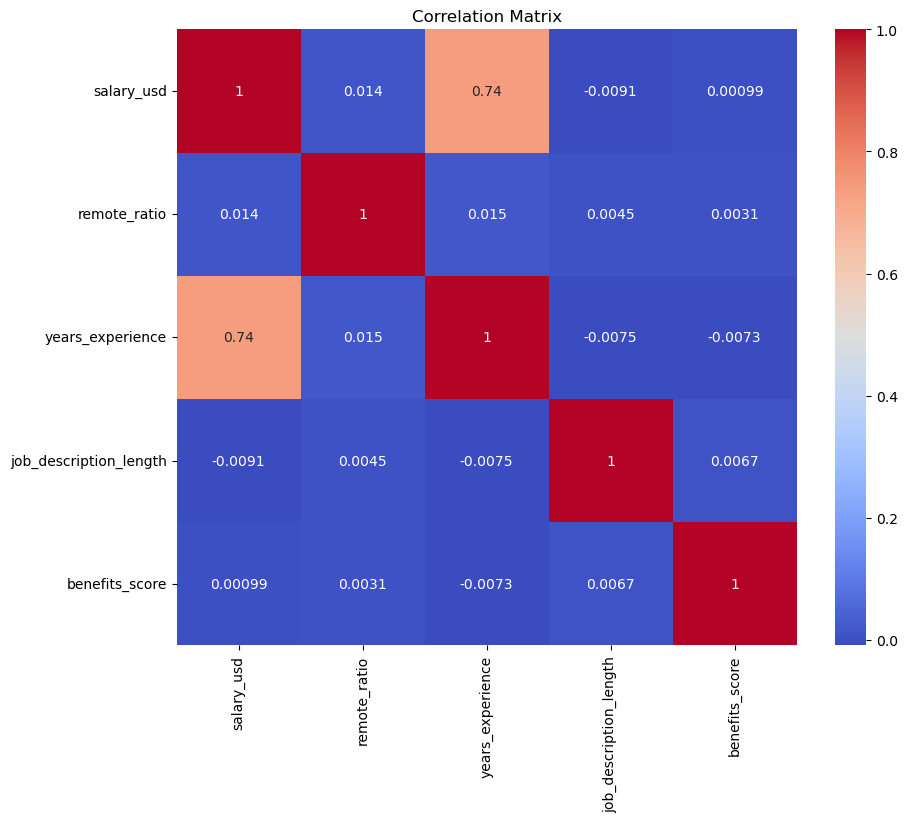

In [7]:
# Basic Data Analysis Template

# 1.Basic Info
print("Dataset shape:", df.shape)
print("\nDataset columns:\n", df.columns)
df.info()

# 2.First 5 rows
df.head()

# 3️.Missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 4️.Summary statistics for numeric columns
df.describe()

# 5️.Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())

# 6️.Correlation matrix (for numeric columns)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
import pandas as pd

# === Step 0: Load your dataset (after successful kagglehub load) ===
# df = ...  # your DataFrame

# === 1. Total number of job postings ===
total_jobs = len(df)
print(f"Total job postings: {total_jobs:,}")

Total job postings: 15,000


In [9]:
# === 2. Fix salary column: convert to numeric and drop missing ===
# Assuming 'salary_usd' column exists—if not, adjust accordingly.
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')
salary_df = df.dropna(subset=['salary_usd'])

In [10]:
# === 3. Job title averages ===
# Group by job title and compute average salary & job counts
title_stats = (
    salary_df
    .groupby('job_title')
    .agg(
        avg_salary=('salary_usd', 'mean'),
        job_count=('salary_usd', 'count')
    )
    .sort_values('avg_salary', ascending=False)
)

In [11]:
# === 4. Display top 10 highest-paying AI jobs ===
top_10 = title_stats.head(10)
print("\nTop 10 AI job titles by average salary:")
print(top_10)


Top 10 AI job titles by average salary:
                              avg_salary  job_count
job_title                                          
AI Specialist              120570.758242        728
Machine Learning Engineer  118827.919689        772
Head of AI                 118542.968627        765
AI Research Scientist      117897.925926        756
AI Architect               117436.513619        771
Robotics Engineer          116470.793149        759
Principal Data Scientist   116305.219346        734
Research Scientist         116066.502695        742
Data Engineer              115970.720961        749
Data Scientist             115819.008333        720


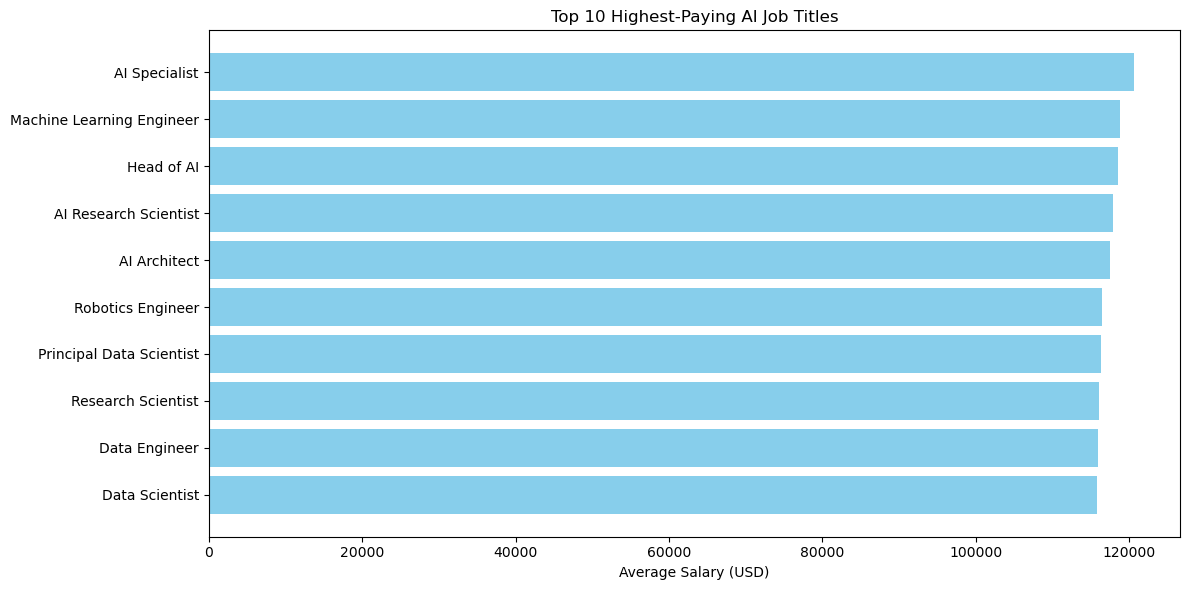

In [12]:
# === 5. Optional: Show a bar chart ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_10.index[::-1], top_10['avg_salary'][::-1], color='skyblue')
plt.xlabel('Average Salary (USD)')
plt.title('Top 10 Highest‑Paying AI Job Titles')
plt.tight_layout()
plt.show()

# Filtering By Regions or Countries

## Filter By Country - USA

Total AI job postings in USA: 716

Top 10 Highest Paying AI Job Titles in USA:
                                avg_salary  job_count
job_title                                            
AI Architect                 160816.378378         37
Principal Data Scientist     151702.390244         41
Computer Vision Engineer     150877.074074         27
Machine Learning Researcher  146851.264706         34
Research Scientist           145180.236842         38
AI Specialist                142926.511628         43
Data Analyst                 142797.352941         34
NLP Engineer                 141901.500000         30
Data Scientist               141026.488372         43
Head of AI                   137964.365854         41


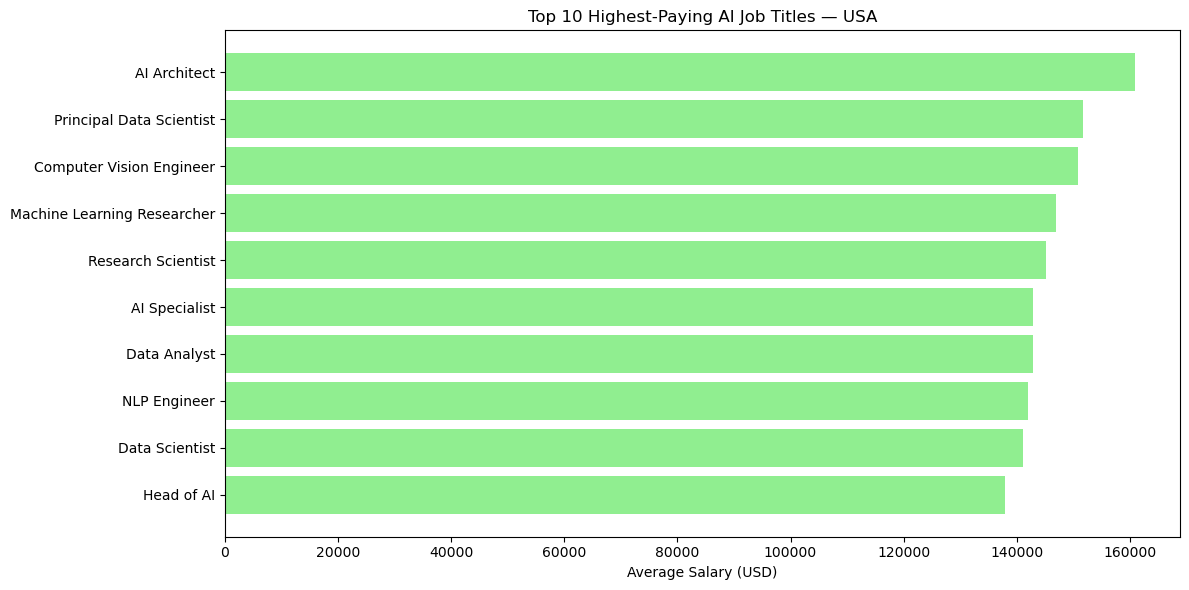

In [16]:
# Example: Filter jobs only for USA
usa_jobs = salary_df[salary_df['employee_residence'] == 'United States']

# Total postings in USA
total_usa_jobs = len(usa_jobs)
print(f"Total AI job postings in USA: {total_usa_jobs:,}")

# Highest paying jobs in USA
usa_title_stats = (
    usa_jobs
    .groupby('job_title')
    .agg(
        avg_salary=('salary_usd', 'mean'),
        job_count=('salary_usd', 'count')
    )
    .sort_values('avg_salary', ascending=False)
)

# Top 10 highest-paying jobs in USA
top_10_usa = usa_title_stats.head(10)
print("\nTop 10 Highest Paying AI Job Titles in USA:")
print(top_10_usa)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_usa.index[::-1], top_10_usa['avg_salary'][::-1], color='lightgreen')
plt.xlabel('Average Salary (USD)')
plt.title('Top 10 Highest‑Paying AI Job Titles — USA')
plt.tight_layout()
plt.show()



## Filter By Region - Europe

Total AI job postings in Europe: 0

Top 10 Highest Paying AI Job Titles in Europe:
Empty DataFrame
Columns: [avg_salary, job_count]
Index: []


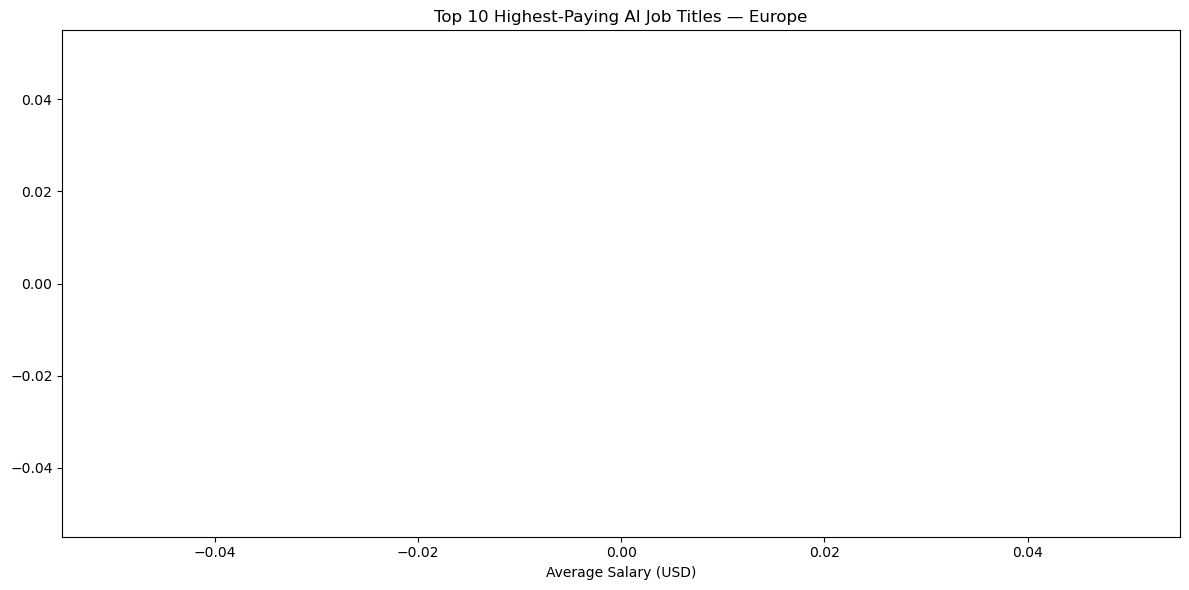

In [18]:
# Example: Filter for Europe
europe_jobs = salary_df[salary_df['employee_residence'] == 'Europe']

# Total postings in Europe
total_europe_jobs = len(europe_jobs)
print(f"Total AI job postings in Europe: {total_europe_jobs:,}")

# Highest paying jobs in Europe
europe_title_stats = (
    europe_jobs
    .groupby('job_title')
    .agg(
        avg_salary=('salary_usd', 'mean'),
        job_count=('salary_usd', 'count')
    )
    .sort_values('avg_salary', ascending=False)
)

# Top 10 highest-paying jobs in Europe
top_10_europe = europe_title_stats.head(10)
print("\nTop 10 Highest Paying AI Job Titles in Europe:")
print(top_10_europe)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_europe.index[::-1], top_10_europe['avg_salary'][::-1], color='orange')
plt.xlabel('Average Salary (USD)')
plt.title('Top 10 Highest‑Paying AI Job Titles — Europe')
plt.tight_layout()
plt.show()


## Filter By Region - France

Total AI job postings in France: 781

Top 10 Highest Paying AI Job Titles in France:
                                avg_salary  job_count
job_title                                            
AI Research Scientist        131464.750000         36
Robotics Engineer            126336.100000         50
Principal Data Scientist     123239.222222         36
NLP Engineer                 122744.725000         40
Research Scientist           122697.578947         38
AI Architect                 122438.764706         34
Autonomous Systems Engineer  119204.833333         42
Data Scientist               117629.290323         31
AI Specialist                116517.422222         45
Machine Learning Engineer    115323.159091         44


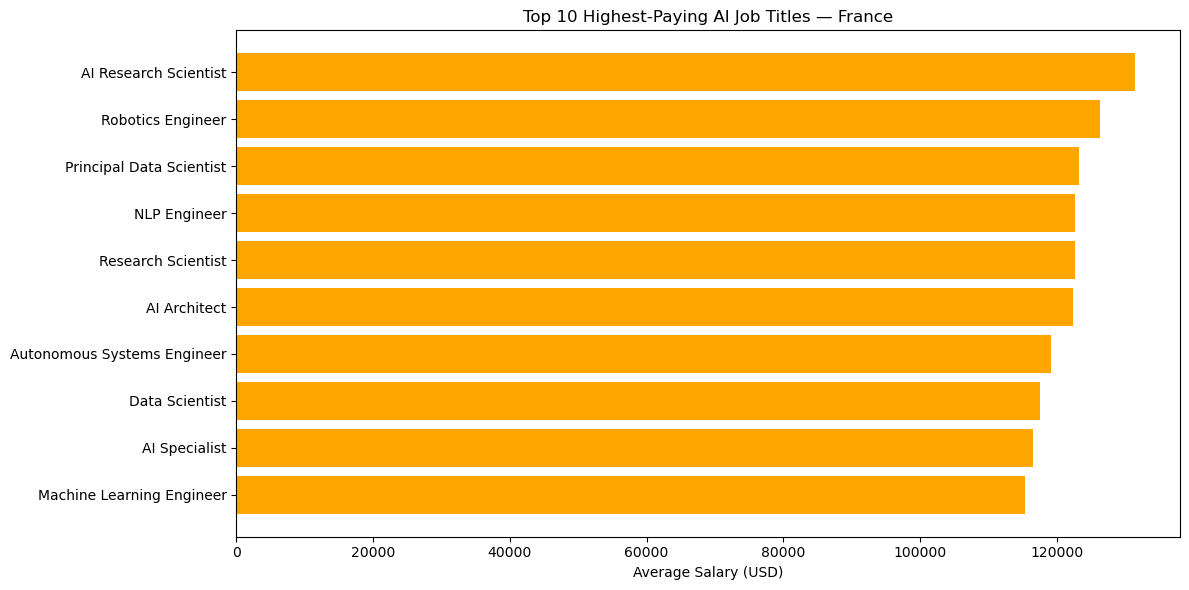

In [21]:
# Example: Filter for France
france_jobs = salary_df[salary_df['employee_residence'] == 'France']

# Total postings in France
total_france_jobs = len(france_jobs)
print(f"Total AI job postings in France: {total_france_jobs:,}")

# Highest paying jobs in France
france_title_stats = (
    france_jobs
    .groupby('job_title')
    .agg(
        avg_salary=('salary_usd', 'mean'),
        job_count=('salary_usd', 'count')
    )
    .sort_values('avg_salary', ascending=False)
)

# Top 10 highest-paying jobs in France
top_10_france = france_title_stats.head(10)
print("\nTop 10 Highest Paying AI Job Titles in France:")
print(top_10_france)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_france.index[::-1], top_10_france['avg_salary'][::-1], color='orange')
plt.xlabel('Average Salary (USD)')
plt.title('Top 10 Highest‑Paying AI Job Titles — France')
plt.tight_layout()
plt.show()

# Salary Distribution by Regions

In [22]:
print(df.columns.tolist())

['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name']


In [26]:
# Step 1: Convert salary column to numeric (safe)
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

In [27]:
# Step 2: Drop missing salaries
salary_df = df.dropna(subset=['salary_usd'])

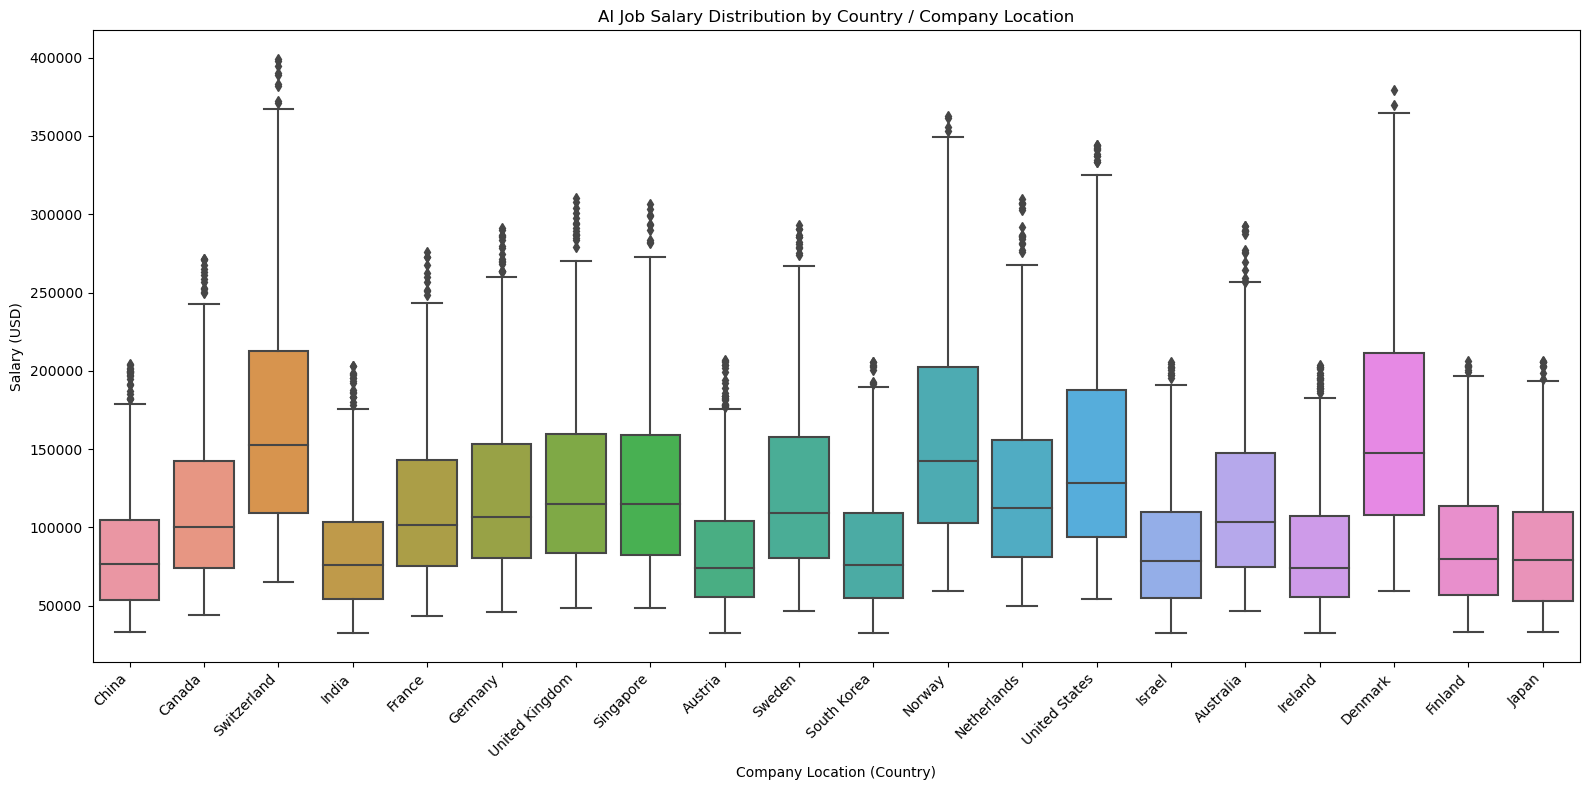

In [29]:
# Step 3: Plot salary distribution by region (country)
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='company_location',
    y='salary_usd',
    data=salary_df
)

plt.xticks(rotation=45, ha='right')
plt.title('AI Job Salary Distribution by Country / Company Location')
plt.ylabel('Salary (USD)')
plt.xlabel('Company Location (Country)')
plt.tight_layout()
plt.show()

# AI Salary Trends Across Experience Levels (Entry to Executive)

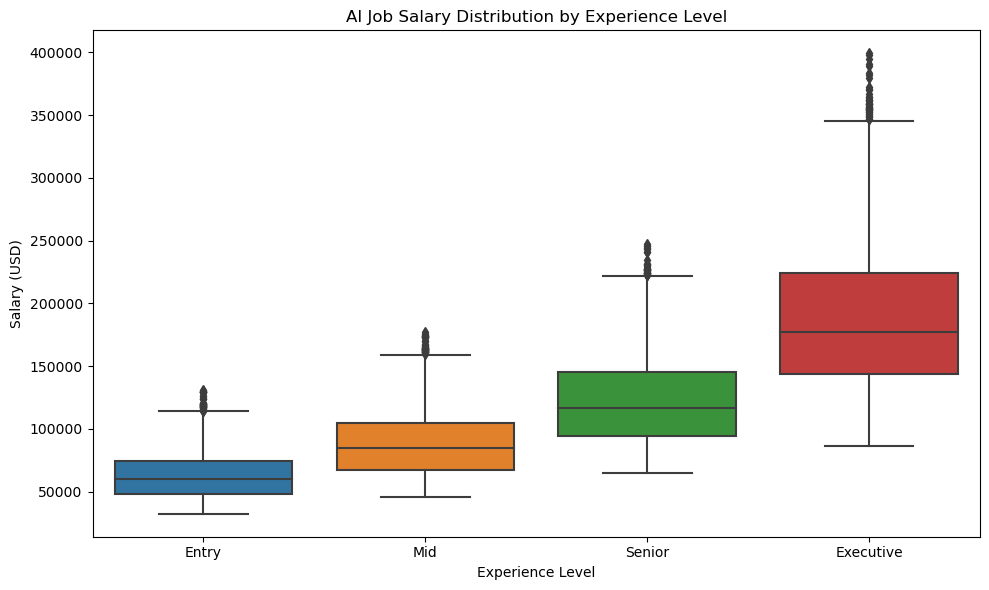

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert salary column to numeric (safe step)
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# Drop missing salaries
salary_df = df.dropna(subset=['salary_usd'])

# Plot salary vs. experience level
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='experience_level',
    y='salary_usd',
    data=salary_df,
    order=['EN', 'MI', 'SE', 'EX']  # Order from Entry to Executive
)

plt.title('AI Job Salary Distribution by Experience Level')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry', 'Mid', 'Senior', 'Executive'])
plt.tight_layout()
plt.show()
 

# AI Salary Trends by Company Size

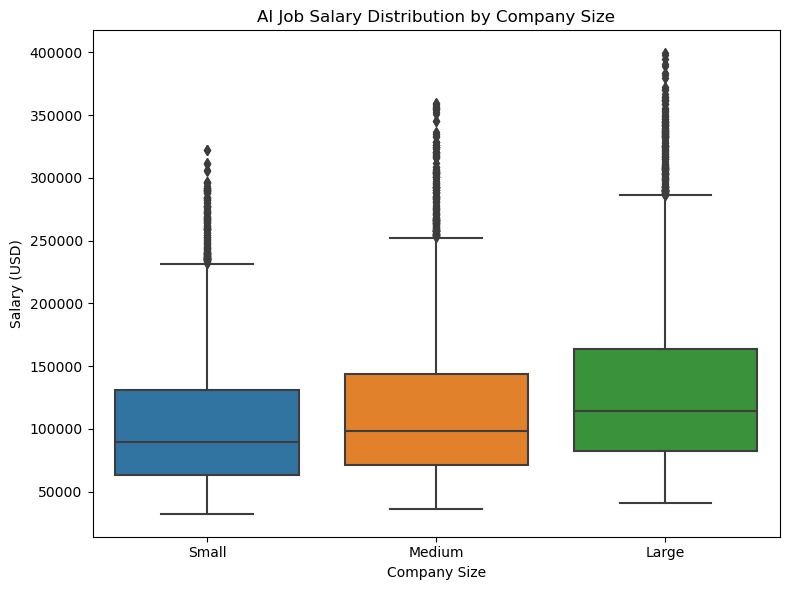

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert salary column to numeric
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# Drop missing salaries
salary_df = df.dropna(subset=['salary_usd'])

# Plot salary vs. company size
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='company_size',
    y='salary_usd',
    data=salary_df,
    order=['S', 'M', 'L']  # Ordered Small → Medium → Large
)

plt.title('AI Job Salary Distribution by Company Size')
plt.ylabel('Salary (USD)')
plt.xlabel('Company Size')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])
plt.tight_layout()
plt.show()


# AI Salary Trends by Job Title (Top Roles)

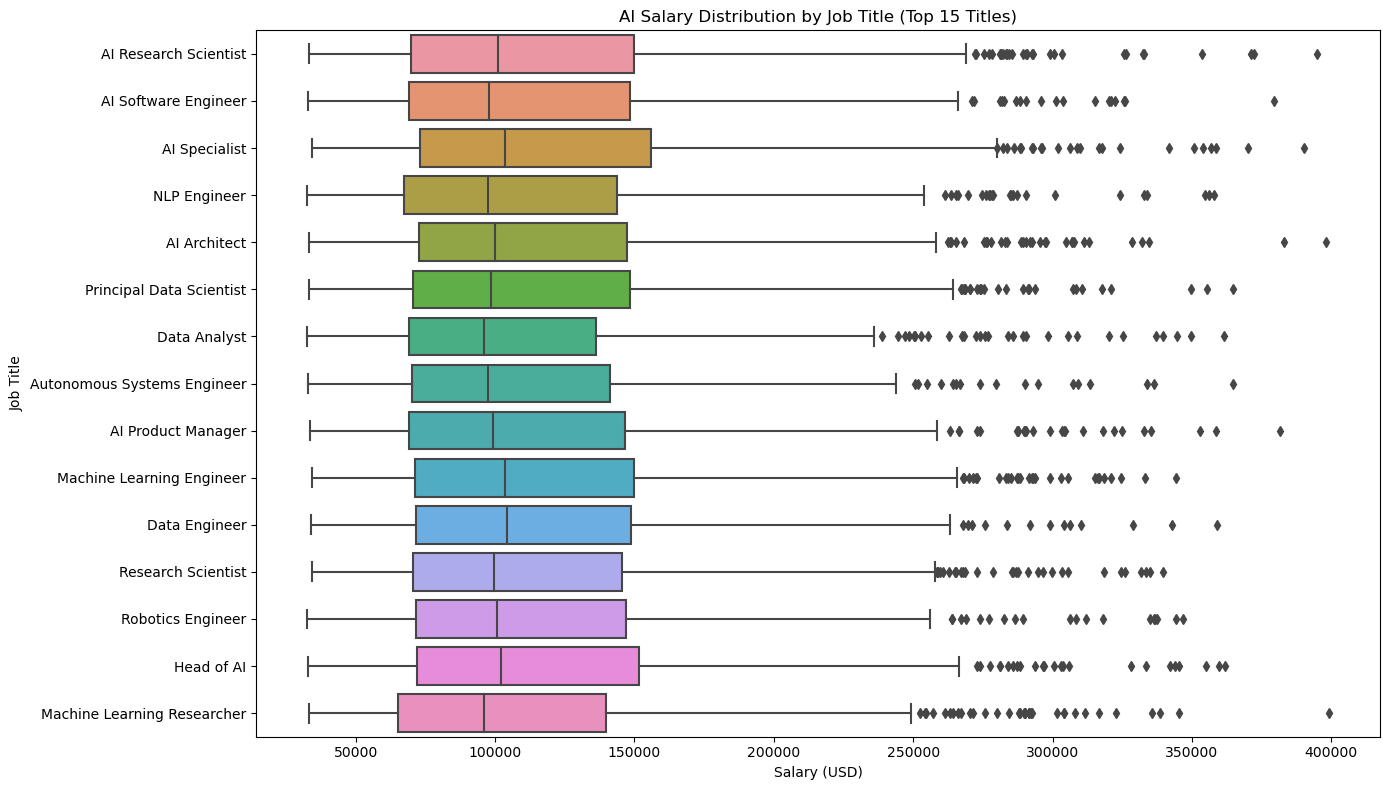

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert salary column to numeric
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# Drop missing salaries
salary_df = df.dropna(subset=['salary_usd'])

# Optional — Only take job titles with enough postings (avoid 1-off titles)
top_titles = (
    salary_df['job_title']
    .value_counts()
    .head(15)   # Change to 20 or 10 if you want
    .index
)

filtered_df = salary_df[salary_df['job_title'].isin(top_titles)]

# Plot salary vs. job title (boxplot)
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='salary_usd',
    y='job_title',
    data=filtered_df
)

plt.title('AI Salary Distribution by Job Title (Top 15 Titles)')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


# Top 5 Countries — Highest Paying AI Job Titles (Median Salary)

In [34]:
# Convert salary column to numeric
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# Drop missing salaries
salary_df = df.dropna(subset=['salary_usd'])

# Step 1: Average salary per country
country_salary = (
    salary_df
    .groupby('company_location')
    .agg(median_salary=('salary_usd', 'median'), job_count=('job_id', 'count'))
    .sort_values('median_salary', ascending=False)
)

# Step 2: Take Top 5 Countries by Median Salary
top_5_countries = country_salary.head(5).index.tolist()

# Step 3: For those 5 countries, find top job title by median salary
top_jobs = (
    salary_df[salary_df['company_location'].isin(top_5_countries)]
    .groupby(['company_location', 'job_title'])
    .agg(median_salary=('salary_usd', 'median'), job_count=('job_id', 'count'))
    .reset_index()
    .sort_values(['company_location', 'median_salary'], ascending=[True, False])
)

# Step 4: Keep only top job per country
top_job_per_country = (
    top_jobs.groupby('company_location').first().reset_index()
)

# Step 5: Display final table
top_job_per_country[['company_location', 'job_title', 'median_salary']]


,company_location,job_title,median_salary
0,Denmark,AI Product Manager,219983.0
1,Norway,ML Ops Engineer,163938.0
2,Switzerland,Head of AI,186347.0
3,United Kingdom,Data Engineer,136321.5
4,United States,Machine Learning Researcher,162756.0


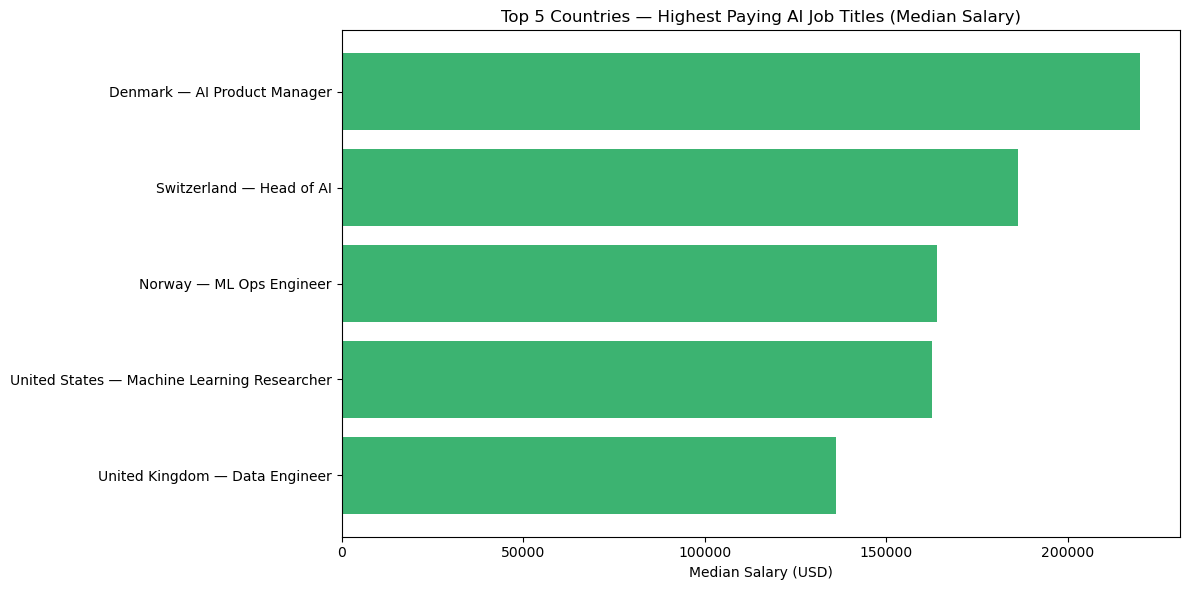

In [35]:
import matplotlib.pyplot as plt

# Use the table from previous step:
# top_job_per_country

# Create a label combining country + job title
top_job_per_country['label'] = (
    top_job_per_country['company_location'] + ' — ' + top_job_per_country['job_title']
)

# Sort for nice plotting (highest salary on top)
top_job_per_country = top_job_per_country.sort_values('median_salary', ascending=True)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(
    top_job_per_country['label'],
    top_job_per_country['median_salary'],
    color='mediumseagreen'
)

plt.xlabel('Median Salary (USD)')
plt.title('Top 5 Countries — Highest Paying AI Job Titles (Median Salary)')
plt.tight_layout()
plt.show()
